Task 1. Identify a loud binary black hole signal in white, Gaussian noise.

- Use the data file "challenge1.gwf".
- The channel name is "H1:CHALLENGE1".
- The data are white, Gaussian noise containing a simulated BBH signal.
- Load the data into memory. What are the sampling rate and duration of the data?
- Plot the data in the time-domain.
- Plot a spectrogram (or q-transform) of the data, and try to identify the signal.
- What is the time of the merger?


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
! pip install -q 'gwosc==0.5.4'

In [ ]:
import gwosc
print(gwosc.__version__)

0.5.4


In [ ]:
from gwosc.datasets import find_datasets
from gwosc import datasets

In [ ]:
from gwosc.datasets import event_gps
from gwosc.datasets import run_segment
from gwosc.locate import get_event_urls

In [ ]:
! pip install -q 'gwpy==2.0.2'

In [ ]:
import gwpy
print(gwpy.__version__)

2.0.2


In [ ]:
from gwpy.timeseries import TimeSeries

In [ ]:
! pip install lalsuite

Above is all the imports I need separated so I don't need to run the whole thing again if I mess up.

In [ ]:
data = TimeSeries.read('/content/gdrive/My Drive/Google Colab/challenge1.gwf', 'H1:CHALLENGE1')

print(data)

TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: H1:CHALLENGE1)


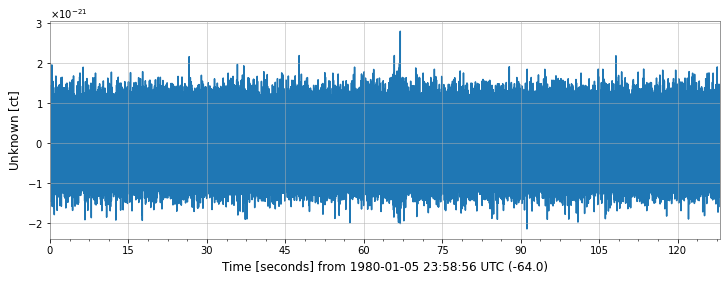

In [ ]:
%matplotlib inline
plot = data.plot()

Above is a plot of the whole data. As is visible, it is all just white noise at the moment.

In [ ]:
print(data.duration)
print(data.sample_rate)

128.0 s
4096.0 Hz


You can see that the duration of the data is 128 seconds and the sampling rate is 4096 Hz.

Now to plot a spectrogram and q-transform of the given data


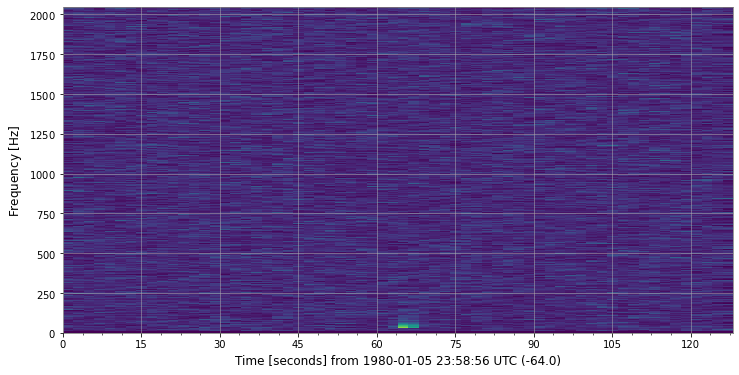

In [ ]:
specgram = data.spectrogram2(fftlength= 4, overlap= 2, window= 'hann')**(1/2.)
plot = specgram.plot()

There appears to be something in the 60-75 second range. Let's zoom in on it to see more.

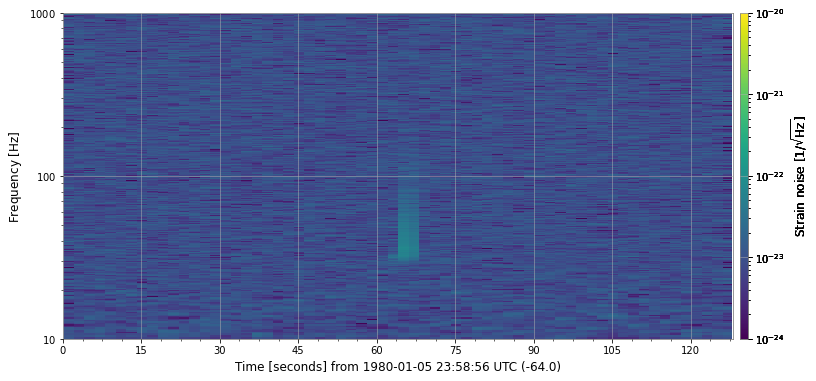

In [ ]:
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1000)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot

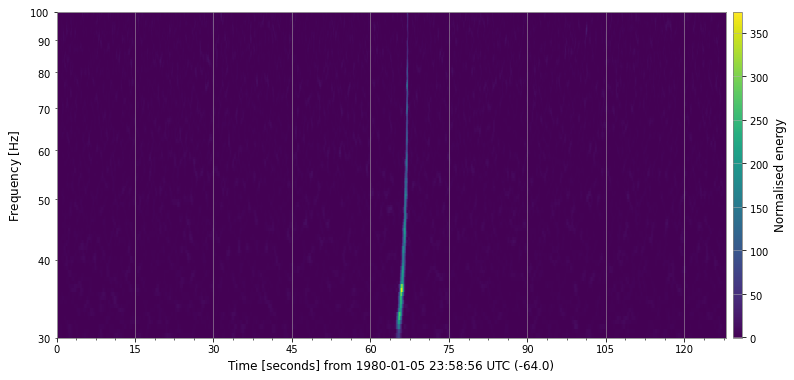

In [35]:
cq = data.q_transform(frange= (30,100), qrange=(100,110))
plot = cq.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

We can see something pretty clear here, lets enhance it to see what we can find.

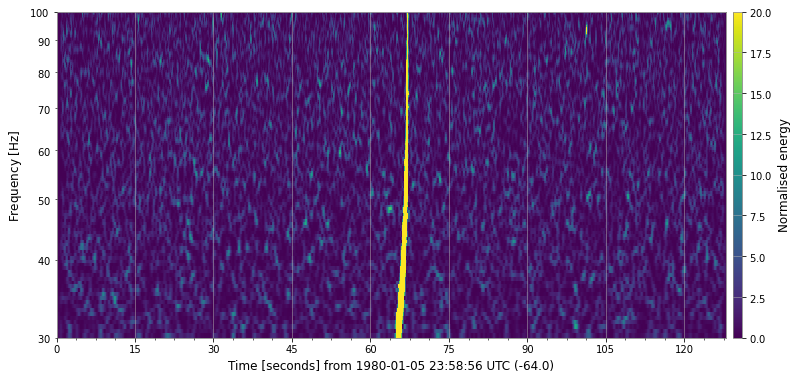

In [36]:
plot.colorbars[0].mappable.set_clim(0,20)
plot.refresh()
plot

We can see that something appears to be merging around 65-70 seconds. (I'll be fully honest, I can't tell if this is a merge or machine error)